In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random

In [3]:
def normal_dist(mu,sigma,size = 1000, n=100000):
    ST = np.random.normal(mu, sigma, n)
    mini = abs(min((ST)))
    for i in range(0,n):
        ST[i] = ST[i] + mini
    count, bins, ignored = plt.hist(ST, 30, density=True)
    plt.xlabel('Time')
    plt.ylabel('prob')
    plt.show()
    return list(ST)[0:size]

In [4]:
def uniform(mu,size = 1000,n=100000):
    Iat = np.random.uniform(0,mu+mu,n)
    count, bins, ignored = plt.hist(Iat, 30, facecolor='blue')
    print("Maximum Count is ",max(count))
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.axis([0, mu+mu, 0, max(count)]) # x_start, x_end, y_start, y_end
    plt.show()
    return list(Iat)[0:size]

Maximum Count is  3423.0


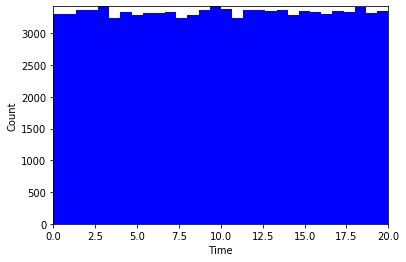

In [5]:
datasetA = pd.DataFrame({'Interval Time': uniform(10) }, columns=['Interval Time'])

Maximum Count is  3434.0


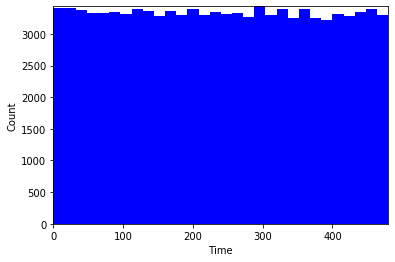

In [6]:
datasetA["Arrival Time"] = 0.0
datasetA["Service Time"] = uniform(240)
datasetA["Departure Time"] = 0.0
datasetA["Lines Filled"] = 0

Maximum Count is  3450.0


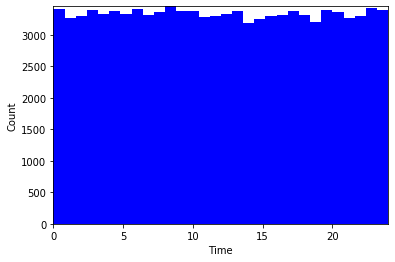

Maximum Count is  3442.0


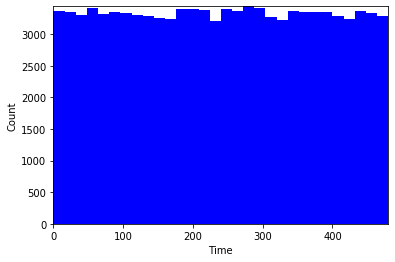

In [7]:
datasetB = pd.DataFrame({'Interval Time': uniform(12) }, columns=['Interval Time'])
datasetB["Arrival Time"] = 0.0
datasetB["Service Time"] = uniform(240)
datasetB["Departure Time"] = 0.0
datasetB["Lines Filled"] = 0

In [8]:
def Arrival_Time(si,dataset):
    dataset["Arrival Time"] = 0.0
    Iat_prev = 0.0
    for i in range(0,si):
        dataset["Arrival Time"][i]= dataset["Inter Time"][i] + Iat_prev
        Iat_prev = dataset["Arrival Time"][i]

In [9]:
def DepartureTime(si,dataset):
    dataset["Departure Time"] = 0.0
    dataset["Departure Time"][0] =  dataset["Arrival Time"][0] + dataset["Service Time"][0] 
    for i in range(1,si):
        dataset["Departure Time"][i]= dataset["Arrival Time"][i] + dataset["Service Time"][i]

In [10]:
def LinesFilled(si,n,dataset):
    c = n - 1
    dataset["Lines Filled"][0] = dataset["Departure Time"][0]
    
    for i in range(1,si):
        line_add = True
        col = len(dataset.columns)
        at_i = dataset["Arrival Time"][i]
        for j in range(4,col):
            #print(dataset.iloc[i - 1,j])
            if(dataset.iloc[i - 1,j] < at_i and line_add == True):
                dataset.iloc[i,j] = dataset["Departure Time"][i]
                line_add = False
            else:
                dataset.iloc[i,j] = dataset.iloc[i-1,j]
        if (line_add == True):
            dataset["Lines Filled" + str(c)] = 0
            dataset["Lines Filled" + str(c)][i] = dataset["Departure Time"][i]
            c = c + 1

In [11]:
def CustomerDisplay(si = 10):
    return dataset.head(si)

In [68]:
res_dataset = pd.DataFrame()

In [69]:
res_dataset["Inter Time"] = 0.0
res_dataset["Arrival Time"] = 0.0
res_dataset["Service Time"] = 0.0
res_dataset["Departure Time"] = 0.0
res_dataset["Lines Filled"] = 0

In [70]:
arr = []
arr2 = []
def Interarrival(siz = 1000):
    i = 0
    while(sum(arr) < 43200):
        n = random.random()
        if (n < 0.5):
            arr.append(np.random.uniform(0,10+10,1)[0])
        else:
            arr.append(np.random.uniform(0,12+12,1)[0])
        arr2.append(np.random.uniform(0,240+240,1)[0])
    return arr,arr2

In [71]:
res_dataset["Inter Time"],res_dataset["Service Time"] = Interarrival()

In [72]:
res_dataset

,Inter Time,Arrival Time,Service Time,Departure Time,Lines Filled
0,16.069692,NaN,441.394086,NaN,NaN
1,7.540852,NaN,68.944828,NaN,NaN
2,13.029143,NaN,196.314925,NaN,NaN
3,5.478535,NaN,114.090987,NaN,NaN
4,7.454223,NaN,421.248877,NaN,NaN
...,...,...,...,...,...
3903,17.924372,NaN,408.524380,NaN,NaN
3904,21.112124,NaN,282.392808,NaN,NaN
3905,23.897535,NaN,132.395213,NaN,NaN
3906,1.608483,NaN,134.318791,NaN,NaN


In [73]:
Arrival_Time(len(res_dataset),res_dataset)
DepartureTime(len(res_dataset),res_dataset)

In [54]:
LinesFilled2(len(res_dataset),1,res_dataset)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


TypeError: 'builtin_function_or_method' object is not subscriptable

In [19]:
lines = []
for i in range(4,len(res_dataset.columns)):
    tim = 0
    arri = 0
    for j in range(0,len(res_dataset)):
        if (res_dataset.iloc[j,i] == 0):
            continue
        elif(res_dataset.iloc[j,i] != arri):
            tim = tim + (res_dataset.iloc[j,i] - res_dataset["Arrival Time"][j])
            arri = res_dataset.iloc[j,i]
    lines.append(tim)

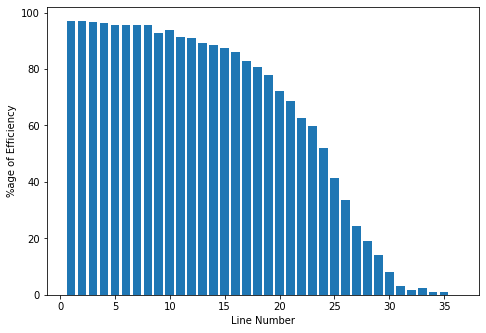

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
li = [i  for i in range(1, len(res_dataset.columns) - 3)]
line = [i/43200 * 100 for i in lines]
ax.bar(li,line)
ax.set_ylabel("%age of Efficiency")
ax.set_xlabel("Line Number")
plt.show()

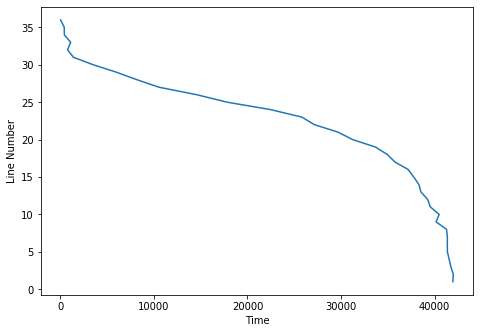

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
li = [i  for i in range(1, len(res_dataset.columns) - 3)]
line = [i for i in lines]
ax.plot(line,li)
ax.set_ylabel("Line Number")
ax.set_xlabel("Time")
plt.show()

In [22]:
res_dataset

,Inter Time,Arrival Time,Service Time,Departure Time,Lines Filled,Lines Filled0,Lines Filled1,Lines Filled2,Lines Filled3,Lines Filled4,...,Lines Filled25,Lines Filled26,Lines Filled27,Lines Filled28,Lines Filled29,Lines Filled30,Lines Filled31,Lines Filled32,Lines Filled33,Lines Filled34
0,4.286118,4.286118,349.885649,354.171768,354.171768,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.803705,10.089824,53.948060,64.037883,354.171768,64.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,14.424291,24.514114,345.847014,370.361128,354.171768,64.000000,370.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,11.752157,36.266271,50.527505,86.793776,354.171768,64.000000,370.000000,86.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17.387596,53.653867,277.249830,330.903698,354.171768,64.000000,370.000000,86.000000,330.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,1.837836,43149.996684,132.267717,43282.264401,43403.803130,43342.395885,43245.822402,43450.126897,43292.528214,43476.641348,...,42900.245259,40208.10479,40324.725527,40078.101836,40342.347787,40218.497275,40440.753184,40425.634458,40237.950559,40075.836534
3938,19.900073,43169.896757,311.830572,43481.727329,43403.803130,43342.395885,43245.822402,43450.126897,43292.528214,43476.641348,...,42900.245259,40208.10479,40324.725527,40078.101836,40342.347787,40218.497275,40440.753184,40425.634458,40237.950559,40075.836534
3939,19.336913,43189.233670,271.517755,43460.751425,43403.803130,43342.395885,43245.822402,43450.126897,43292.528214,43476.641348,...,42900.245259,40208.10479,40324.725527,40078.101836,40342.347787,40218.497275,40440.753184,40425.634458,40237.950559,40075.836534
3940,0.348600,43189.582270,245.248345,43434.830615,43403.803130,43342.395885,43245.822402,43450.126897,43292.528214,43476.641348,...,42900.245259,40208.10479,40324.725527,40078.101836,40342.347787,40218.497275,40440.753184,40425.634458,40237.950559,40075.836534


In [38]:
def pl():
    for i in range(4,len(res_dataset.columns)):
        arri = 0
        for j in range(0,len(res_dataset)):
            if (res_dataset.iloc[j,i] > 0): 
                tim = res_dataset["Arrival Time"][i]
                lines.append(tim)
                break

In [39]:
lines = []
pl()

In [40]:
lines

[53.65386735657276,
 53.659872865892424,
 59.76597635560528,
 65.34685185426395,
 84.29231512449958,
 97.30276317176694,
 102.42786599878042,
 110.06785509285923,
 110.83592590233518,
 122.54679762083565,
 144.93448127315202,
 168.50610394958204,
 183.35771518624722,
 185.96458604913346,
 186.55562429829394,
 203.97323095743138,
 210.12506966485708,
 221.1586040591602,
 237.32524304381087,
 250.13744072197855,
 251.57187298203277,
 263.0857712834677,
 276.1231777875344,
 282.5118937722299,
 287.92795092389446,
 299.4937003161982,
 308.47261657168934,
 308.98908877616253,
 323.9858439249749,
 332.9083844545924,
 333.5624238354604,
 339.99359195112265,
 344.22804177304357,
 345.0335523492784,
 363.9550654254361,
 377.97343796798896]

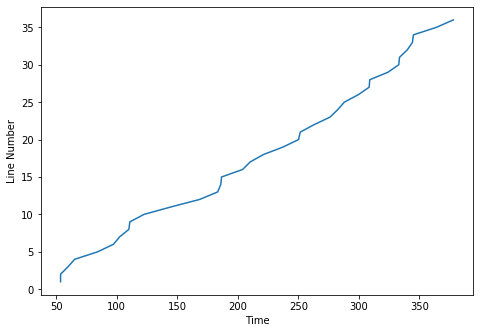

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
li = [i  for i in range(1, len(res_dataset.columns) - 3)]
line = [i for i in lines]
ax.plot(line,li)
ax.set_ylabel("Line Number")
ax.set_xlabel("Time")
plt.show()

In [125]:
res_dataset = pd.DataFrame()
res_dataset["Inter Time"] = 0.0
res_dataset["Arrival Time"] = 0.0
res_dataset["Service Time"] = 0.0
res_dataset["Departure Time"] = 0.0
res_dataset["Lines Filled"] = 0

In [126]:
res_dataset["Inter Time"],res_dataset["Service Time"] = Interarrival()

In [127]:
Arrival_Time(len(res_dataset),res_dataset)
DepartureTime(len(res_dataset),res_dataset)

In [128]:
def LinesFilled2(si,n,dataset):
    c = n - 1
    dataset["Lines Filled"][0] = dataset["Departure Time"][0]
    
    for i in range(1,si):
        lines_free = []
        line_add = True
        col = len(dataset.columns)
        at_i = dataset["Arrival Time"][i]
        for j in range(4,col):
            #print(dataset.iloc[i - 1,j])
            if(dataset.iloc[i - 1,j] <= at_i):
                #dataset.iloc[i,j] = dataset["Departure Time"][i]
                lines_free.append(j)
                line_add = False
            else:
                dataset.iloc[i,j] = dataset.iloc[i-1,j]
        if (line_add == True):
            dataset["Lines Filled" + str(c)] = 0
            dataset["Lines Filled" + str(c)][i] = dataset["Departure Time"][i]
            c = c + 1
        else :
            no = random.randint(0,len(lines_free))
            #print(len(lines_free))
            dataset.iloc[i,lines_free[no]] = dataset["Departure Time"][i]

In [129]:
LinesFilled2(len(res_dataset),1,res_dataset)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IndexError: list index out of range

In [121]:
lines = []
for i in range(4,len(res_dataset.columns)):
    tim = 0
    arri = 0
    for j in range(0,len(res_dataset)):
        if (res_dataset.iloc[j,i] == 0):
            continue
        elif(res_dataset.iloc[j,i] != arri):
            tim = tim + (res_dataset.iloc[j,i] - res_dataset["Arrival Time"][j])
            arri = res_dataset.iloc[j,i]
    lines.append(tim)

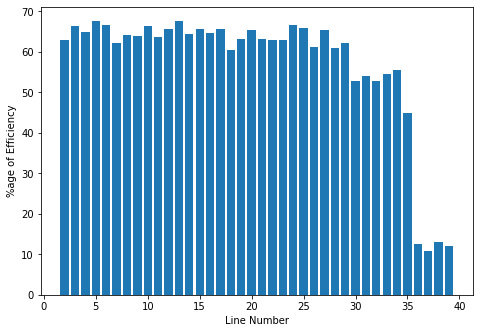

In [122]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
li = [i  for i in range(1, len(res_dataset.columns) - 3)]
line = [i/43200 * 100 for i in lines]
ax.bar(li,line)
ax.set_ylabel("%age of Efficiency")
ax.set_xlabel("Line Number")
plt.show()

In [90]:
lines

[42254.38822442624,
 42009.788017398416,
 41763.99552150788,
 41565.22785562718,
 41353.481754659624,
 40989.658986377275,
 41120.096998816145,
 40599.36710994498,
 40857.44812491087,
 39577.88713143639,
 39976.87838454229,
 39591.29230089471,
 38796.80883456247,
 38467.213012709966,
 37546.78952197991,
 36134.36274897637,
 34858.85211658445,
 34214.14195191601,
 32808.55913984199,
 30574.8826982154,
 28727.57760969822,
 26052.95550177629,
 23918.15441352543,
 20512.842401161884,
 18341.960266614547,
 11904.130986521997,
 11216.181582368503,
 6520.299627736205,
 4200.171670725918,
 3589.5344063679713,
 2279.108468199731,
 1697.3284131787386,
 974.2562666580816,
 226.25223489617383,
 407.12158899775386,
 119.12923069898534,
 194.75992151452374,
 34.75271866944968]

In [98]:
random.randint(0,2)

1